# Step 1: Implement the vector gradient.

Implement the vector gradient as described in the lecture slides and the assignment description in the `color_sobel_edges()` function below.  Use sobel filters to estimate partial derivatives.  Use the `color_dot_product()` function (provided) to compute the necessary dot products to obtain gxx, gyy, and gxy.  Return an array containing the gradient magnitudes for each pixel, i.e. a graident magnitude image.  Optionally, return a second array containing the gradient directions for each pixel.

As usual, the input image must be dtype `float` or `uint8`.  If it is `uint8` convert it to `float` before processing.  Leave the magnitude image ouput as dtype `float` regardless of the input's dtype.



In [1]:
import skimage.util as util
import skimage.filters as filt
import numpy as np


def color_dot_product(A, B):
    '''
    Element-by-element dot product in a 2D array of vectors.

    :return: An array in which index [i,j,:] is the dot product of A[i,j,:] and B[i,j,:].
    '''
    return np.sum(A.conj()*B, axis=2)



def color_sobel_edges(I):
    '''
    Finish me!
    
    :param I: 
    :return: 
    '''
    if I.dtype == np.uint8:
        I = util.img_as_float(I)
        
    v = np.zeros_like(I)
    h = np.zeros_like(I)
    
    for chnl in range(I.shape[2]):
        v[:,:,chnl] = filt.sobel_v(I[:,:,chnl])
        h[:,:,chnl] = filt.sobel_h(I[:,:,chnl])
        
    xx = color_dot_product(h, h)
    xy = color_dot_product(h, v)
    yy = color_dot_product(v, v)
    
    theta = 0.5 * np.arctan2(2 * xy, xx - yy)
    mag = np.sqrt(0.5 * (xx + yy + (xx - yy) * np.cos(2 * theta) + 2 * xy * np.sin(2 * theta)))
    
    return (mag, theta)

# Step 2: Examine behavior of the kurtosis sharpness metric.

Write a function which:

* takes as input an input image, a minimum value of sigma, and a maximum value of sigma.
* applies different amounts of Gaussian blur to the original image for all integer values of sigma between the provided minimum and maximum values of sigma, inclusive. (reminder: sigma describes the standard deviation of the gaussian filter mask used to blur the image).
* For each blurred image, compute the gradient magnitude using `color_sobel_edges()`, then compute compute the kurtosis sharpness measure.  This is the log(kurtosis+3) where kurtosis is the kurtosis of the gradient magnitude image of the blurred image as described in the assignment description document.  See `scipy.stats.kurtosis()`.
* Returns a tuple consisting of the range object of sigma values used and the list of computed kurtosis values for each sigma.

Call the function using `mushroom.jpg` as the input image, a minimum sigma of 1, and a maximum sigma of 30.  Use a smaller max sigma until you are sure it's working, then increase to 30, as it can take a few minutes to do all the filtering.  Use the return values from your function to plot a line graph of gaussian blur sigma vs. blur measure (kurtosis) for the waterfall image.  Add appropriate axis labels and a descriptive title.  Sample output is provided in the assignment description document.



Text(0.5,1,'Kurtosis sharpness measure of mushroom.jpg for increasing blur.')

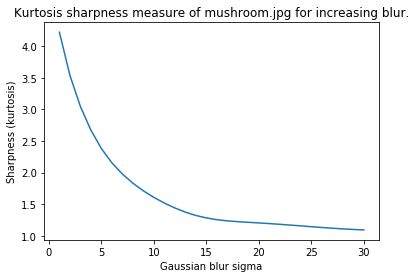

In [8]:
% matplotlib inline
import scipy.stats as stat
import skimage.io as io
import matplotlib
import matplotlib.pyplot as plt

def test_blur_measure(I, min_sigma, max_sigma):
    '''
    Finish me!
    
    :param I: 
    :param min_sigma: 
    :param max_sigma: 
    :return: 
    '''
    sigma = [] 
    shrp = []
    for i in range(min_sigma, max_sigma + 1):
        sigma.append(i)
        I_blur = filt.gaussian(I, sigma = i, multichannel=True)
        (I_mag, I_theta) = color_sobel_edges(I_blur)
        shrp.append(np.asscalar(np.log(stat.kurtosis(np.reshape(I_mag, [I_mag.shape[0] * I_mag.shape[1], 1])) + 3)))
        
    return (sigma, shrp)

myimage = io.imread('mushroom.jpg')
(sigma, shrp) = test_blur_measure(myimage,1,30)
plt.plot(sigma, shrp)
plt.xlabel('Gaussian blur sigma')
plt.ylabel('Sharpness (kurtosis)')
plt.title('Kurtosis sharpness measure of mushroom.jpg for increasing blur.')

# Step 3:  Create a local blur map

Write a function which:

* takes as input an input image and a square window size (in pixels). e.g. if `window_size = 11`, this means an 11 by 11 window.
* computes the local sharpness of the input image (i.e. log(kurtosis+3)) for each tiled, non-overlapping square window of the given window size
* stores each local sharpness in an array where each entry represents one window of the input image (the size of this array can be computed by integer division of the original image dimensions by the window size)
* returns the array of local sharpnesses.

Then call the function you just wrote with `mushroom.jpg` as the input image and 100 as the window size.  Plot the returned array as an image using `plt.imshow()`.  Do not rescale this image with `vmin=` or `vmax=`, and use the default colormap (don't change it to `'gray'`).  Add a color scale bar to the figure using `plt.colorbar()`.  Sample output is provided in the assignment description document.



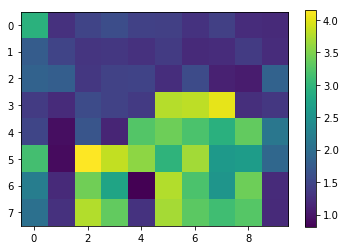

In [19]:
def sharpness_map(I, window_size):
    '''
    
    Finish me!
    
    :param I: 
    :param window_size: 
    :return: 
    '''
    local_shrp = np.zeros((I.shape[0] // int(window_size), I.shape[1] // int(window_size)))
    for i in range(local_shrp.shape[0]):
        for j in range(local_shrp.shape[1]):
            local = I[i * window_size : (i + 1) * window_size, j * window_size : (j + 1) * window_size,:]
            (local_mag, local_theta) = color_sobel_edges(local)
            local_shrp[i, j] = np.asscalar(np.log(stat.kurtosis(np.reshape(local_mag, [local_mag.shape[0] * local_mag.shape[1], 1])) + 3))
            
    return local_shrp

local_shrp = sharpness_map(myimage, 100)
plt.imshow(local_shrp)
plt.colorbar()

# Step 4: Try it on another image.

Use the functions you wrote to produce the same plots as in steps 2 and 3 but for the `waterfall.jpg` image instead.


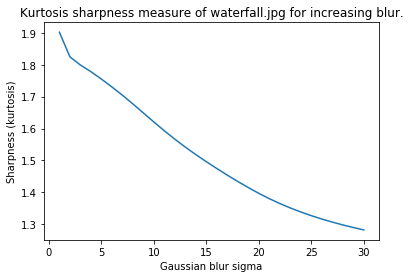

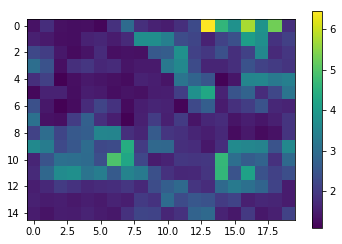

In [22]:
# Write your code here.
myimage = io.imread('waterfall.jpg')
(sigma, shrp) = test_blur_measure(myimage,1,30)
myfigure3 = plt.figure()
plt.plot(sigma, shrp)
plt.xlabel('Gaussian blur sigma')
plt.ylabel('Sharpness (kurtosis)')
plt.title('Kurtosis sharpness measure of waterfall.jpg for increasing blur.')

myfigure4 = plt.figure()
local_shrp = sharpness_map(myimage, 100)
plt.imshow(local_shrp)
plt.colorbar()

# Step 5: Thinking and Qualitative Analysis

### Answer the following questions, right here in this block.

1. Do you think that the log(kurtosis+3) measurement of sharpness (hereafter called the "sharpness measure") is a good measure for characterizing global image blur (the general amount that the entire image is blurred)?  Explain and justify your answer.

	_Your answer:_ I don't think the sharpness measure is a good measure for characterizing global image blur becuase in the mushroom image, log(kurtosis+3) changes few even if the bulrness of images changes a lot when the blurness of images are very large.

2. Is the sharpness measure effective at characterizing variations in local blur?  Does it respond to different regions of images appropriately?  Explain and justify your answers.

	_Your answer:_ It's also not very effective at characterizing variations in local blur. In the waterfall image, the rock and water part is much clearer and sharper than the cloud part. However blur map shows that the rock and water part has lower log(kurtosis+3) values which indicate much blurness.

3. Think of what the shape of a histogram of gradient magnitudes would look like for a sharp image.  Why does this set of gradient magnitudes have high kurtosis?  (It might help to look up kurtosis and see what it measures about a histogram!)

	_Your answer:_  In the histogram of gradient magnitudes, most bars(most pixels) have small gradient magnitude values. Intensity becomes less as gradient magnitude becomes larger. But there are a small number intensities with very large gradient magnitudes. And higher kurtosis is just the result of infrequent extreme deviations.

4. Now think what would happen as that same image gets blurrier.  Explain how the shape of the histogram would change, and the corresponding effect on the kurtosis.

	_Your answer:_  Bars of histogram move in the direction to 0 gradient magnitude and less intensites have extreme large gradient magnitude values. The kurtosis of this image will decrease.